In [1]:
import numpy as np
import tweepy
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
plt.style.use('ggplot')

In [3]:
# Load Data

api_key = "FD3yt8rBbWq8lpWNVk4Hv1YW3"

api_secret_key = "Ki3Lol3l3FVfHoluOazOx2Zo4UvdAAwbsvDWSxB1XCFmAvjfIT"

access_token = "942481457251061761-teYdARTmXo17TUI43iGAfzx8s2tvjWv"

access_token_secret = "9Tnew5QYLJrm3TmOfAebkwYcz0fEhHthZfrtnvB7VAgXW"

In [4]:
# Authentication

authenticate = tweepy.OAuthHandler(api_key,api_secret_key)

authenticate.set_access_token(access_token, access_token_secret)

api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [5]:
# Extract 100 tweets from the twitter user: o9solutions
posts = api.user_timeline(screen_name="o9solutions", count=100, lang="en", tweet_mode="extended")

In [6]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

In [16]:
def cleanTxt(text):
    text = re.sub('@[A-Za-z0–9]+', '', text)  # Removing @mentions
    text = re.sub('#', '', text)  # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text)  # Removing RT
    text = re.sub('https?:\/\/\S+', '', text)  # Removing hyperlink

    return text

In [20]:
# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [26]:
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [27]:
# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [30]:
# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

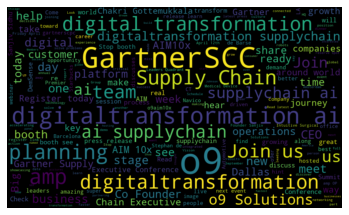

In [36]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=1000, height=600, random_state=21, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [43]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [48]:
print('Printing positive tweets:\n')
j = 1
sortedDF = df.sort_values(by=['Polarity'])  # Sort the tweets
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j + 1

Printing positive tweets:

1) We're headed to the Big Apple this weekend for 2020 NRF Big Show. Join us in New York as we meet with retailers from around the world and discuss how to transform operations. Meet us at booth 1344.
digitaltransformation ai supplychain 

2) Talk about a powerful room of people! Check out the dream team we have on stage hosting a panel discussion. Johnson &amp; Johnson, Danone, Novo Nordisk, Inter IKEA, and Nokia.  DemSense 

3)  interviews Nike at DemSense — what does digital transformation mean to you? 

“Consumer focused. The goal is to do better for our consumers. We need to position planning as a business function.” 

4) We’re live in Amsterdam at DemSense with ! Stephan de Barse doing what he does best and drawing in the audience of thought leaders as we start the day! 

5) Read our latest press release to learn how Pirelli is partnering with o9 to build their digital integrated business planning platform. 
digitaltransformation ai 

6) AIM Chicago hos

In [52]:
print('Printing negative tweets:\n')
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)  # Sort the tweets
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['Tweets'][i])
        print()
        j = j + 1

Printing negative tweets:

1) The secret sauce of demand sensing showcased by one of our favorites - Julian Fischer, Associate Partner at McKinsey. DemSense  



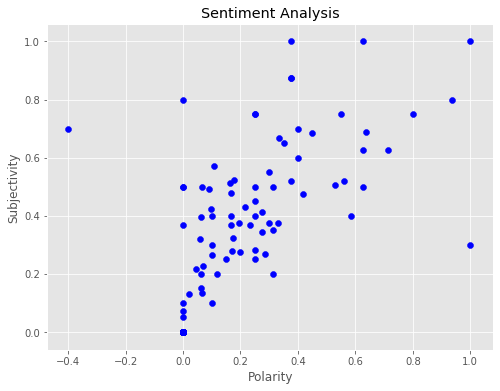

In [53]:
plt.figure(figsize=(8, 6))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')  # plt.scatter(x,y,color)

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [58]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

1     We're headed to the Big Apple this weekend for...
2     Talk about a powerful room of people! Check ou...
3      interviews Nike at DemSense — what does digit...
6     We’re live in Amsterdam at DemSense with ! Ste...
7     Read our latest press release to learn how Pir...
                            ...                        
90    Connect with us at IBF's Predictive Business A...
94    How AI is playing a key role in building a mor...
95    How AI is playing a key role in building a mor...
98    Chakri Gottemukkala, Co-Founder &amp; CEO, sha...
99    Chakri Gottemukkala, Co-Founder &amp; CEO, sha...
Name: Tweets, Length: 68, dtype: object

In [60]:
# Show the value counts
df['Analysis'].value_counts()

Positive    68
Neutral     31
Negative     1
Name: Analysis, dtype: int64

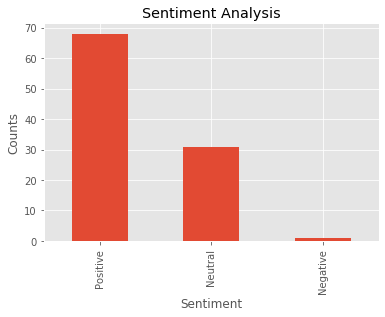

In [63]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()